In [1]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from imgaug import augmenters as iaa

c:\Users\kanna\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## FEATURE EXTRACTION AND DATA PRE-PROCESSING

In [16]:
data_dir = "D:\\PLANT_DISEASE\\archive (7)\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train_final" 

In [17]:
feature_vectors = []
labels = []

In [18]:
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

In [19]:
augmentation = iaa.Sequential([
    iaa.Fliplr(0.5),  # 50% horizontal flips
    iaa.Affine(rotate=(-10, 10)),  # Random rotations between -10 and 10 degrees
    iaa.GaussianBlur(sigma=(0, 1.0)),  # Gaussian blur with a sigma between 0 and 1.0
    iaa.AdditiveGaussianNoise(scale=(0, 0.05 * 255)),  # Gaussian noise
])

In [20]:
for class_label in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_label)
    
    if not os.path.isdir(class_dir):
        continue

    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)

        image = cv2.imread(image_path)
        
        # Apply image augmentation
        image = augmentation.augment_image(image)

        image = cv2.resize(image, (128, 128))

        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        

        features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')

        feature_vectors.append(features)
        labels.append(class_label)

In [21]:
feature_vectors

[array([0.2306182 , 0.13346892, 0.22842676, ..., 0.2008946 , 0.08372439,
        0.0774525 ]),
 array([0.30268497, 0.03407904, 0.10203084, ..., 0.13499041, 0.09386709,
        0.0188746 ]),
 array([0.24507741, 0.16712842, 0.09481246, ..., 0.21598185, 0.13302201,
        0.05906967]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.26896884, 0.06819541, 0.06751796, ..., 0.12907258, 0.22681382,
        0.12307657]),
 array([0.12067994, 0.06029988, 0.02615877, ..., 0.10159426, 0.10573402,
        0.1693393 ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.14337981, 0.03607985, 0.14257316, ..., 0.19394747, 0.173526  ,
        0.15666971]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.15013769, 0.18806132, 0.09449181, ..., 0.09926599, 0.10428593,
        0.05731488]),
 array([0.53333671, 0.02430443, 0.00851027, ..., 0.1360495 , 0.13725736,
        0.09420267]),
 array([0.16412188, 0.08704129, 0.08575131, ..., 0.06727034, 0.053802  ,
        0.09400519]),
 array([0.27051795, 0.081765

In [22]:
labels

['Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___

In [23]:
X = np.array(feature_vectors)

In [24]:
y = np.array(labels)

In [25]:
print(X)

[[0.2306182  0.13346892 0.22842676 ... 0.2008946  0.08372439 0.0774525 ]
 [0.30268497 0.03407904 0.10203084 ... 0.13499041 0.09386709 0.0188746 ]
 [0.24507741 0.16712842 0.09481246 ... 0.21598185 0.13302201 0.05906967]
 ...
 [0.22472384 0.17387665 0.06076164 ... 0.19280963 0.22150087 0.08089366]
 [0.13373838 0.23024784 0.04265059 ... 0.18660502 0.13951595 0.        ]
 [0.22160249 0.14613205 0.12106675 ... 0.07971506 0.12589608 0.18472035]]


In [26]:
X.shape,y.shape

((7500, 8100), (7500,))

In [27]:
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)
y_enc

array([ 0,  0,  0, ..., 14, 14, 14], dtype=int64)

## 

In [28]:
df = pd.DataFrame(y,y_enc)
df

,0
0,Apple___Black_rot
0,Apple___Black_rot
0,Apple___Black_rot
0,Apple___Black_rot
0,Apple___Black_rot
...,...
14,Tomato___Tomato_Yellow_Leaf_Curl_Virus
14,Tomato___Tomato_Yellow_Leaf_Curl_Virus
14,Tomato___Tomato_Yellow_Leaf_Curl_Virus
14,Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [29]:
df.drop_duplicates(inplace=True)
df

,0
0,Apple___Black_rot
1,Blueberry___healthy
2,Cherry_(including_sour)___Powdery_mildew
3,Corn_(maize)___Common_rust_
4,Grape___Black_rot
5,Orange___Haunglongbing_(Citrus_greening)
6,Peach___Bacterial_spot
7,"Pepper,_bell___Bacterial_spot"
8,Potato___Early_blight
9,Raspberry___healthy


## MODEL TRAINING 

In [87]:
KNN_model = KNeighborsClassifier(
    n_neighbors=5,       # Choose an appropriate number of neighbors
    p=1,  # Choose a suitable distance metric
)

In [88]:
KNN_model.fit(X, y_enc)

KNeighborsClassifier(p=1)

# VALIDATING THE MODEL

In [89]:
data_valid_dir = "D:\\PLANT_DISEASE\\archive (7)\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid"

In [90]:
feature_vectors_valid = []
labels_valid = []

In [91]:
for class_label in os.listdir(data_valid_dir):
    class_dir = os.path.join(data_valid_dir, class_label)
    
    if not os.path.isdir(class_dir):
        continue

    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)

        image = cv2.imread(image_path)

        image = cv2.resize(image, (128, 128))
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')
        
        feature_vectors_valid.append(features)
        labels_valid.append(class_label)

In [92]:
feature_vectors_valid

[array([0.21328912, 0.        , 0.16700493, ..., 0.07994909, 0.22296044,
        0.14305417]),
 array([0.15237508, 0.07036889, 0.14665507, ..., 0.21957034, 0.12652922,
        0.13956495]),
 array([0.18057921, 0.00663334, 0.04575824, ..., 0.13672808, 0.13693613,
        0.10316129]),
 array([0.14837934, 0.06614929, 0.07827395, ..., 0.23985809, 0.09318912,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.21607873, 0.13672199, 0.04116568, ..., 0.15775564, 0.13203765,
        0.04620745]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.2919783 , 0.04812105, 0.07872579, ..., 0.0538613 , 0.17429683,
        0.06966076]),
 array([0.22895477, 0.14064216, 0.1700406 , ..., 0.16830015, 0.17651345,
        0.09511412]),
 array([0.23984255, 0.07865992, 0.12987424, ..., 0.13177663, 0.17392774,
        0.08521013]),
 array([0.15702468, 0.24735834, 0.0691484 , ..., 0.23629224, 0.22758263,
        0.12082506]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.23606311, 0.026144

In [93]:
labels_valid

['Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___

In [94]:
X_valid = np.array(feature_vectors_valid)
y_valid = np.array(labels_valid)

## LABEL ENCODING (PRE-PROCESSING)

In [95]:
label_encoder = LabelEncoder()
y_valid = label_encoder.fit_transform(y_valid)

In [96]:
y_valid_pred = KNN_model.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
conf_matrix_valid = confusion_matrix(y_valid, y_valid_pred)
class_report_valid = classification_report(y_valid, y_valid_pred)

In [190]:
acuracy_valid

0.67

## VISUALISATION METRICS FOR VALIDATION

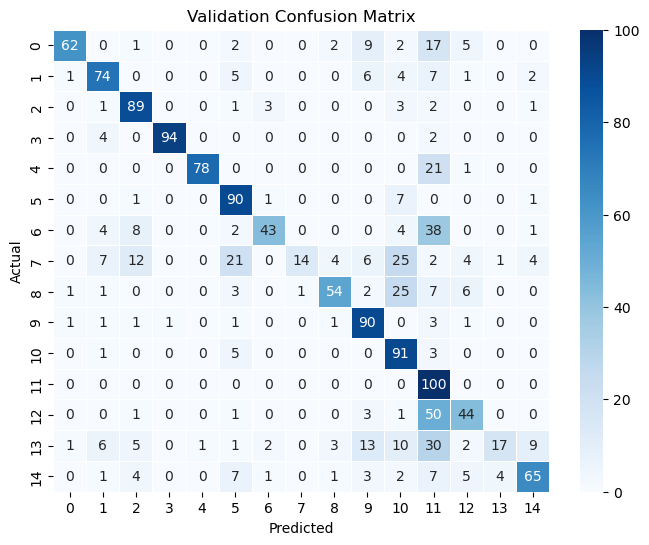

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_valid, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [99]:
import pandas as pd
from sklearn.metrics import classification_report

class_report_dict = classification_report(y_valid, y_valid_pred, output_dict=True)

classification_report_df = pd.DataFrame(class_report_dict)

print('Validation Classification Report:')
classification_report_df


Validation Classification Report:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,accuracy,macro avg,weighted avg
precision,0.939394,0.74,0.729508,0.989474,0.987342,0.647482,0.860000,0.933333,0.830769,0.681818,0.522989,0.346021,0.637681,0.772727,0.783133,0.67,0.760111,0.760111
recall,0.620000,0.74,0.890000,0.940000,0.780000,0.900000,0.430000,0.140000,0.540000,0.900000,0.910000,1.000000,0.440000,0.170000,0.650000,0.67,0.670000,0.670000
f1-score,0.746988,0.74,0.801802,0.964103,0.871508,0.753138,0.573333,0.243478,0.654545,0.775862,0.664234,0.514139,0.520710,0.278689,0.710383,0.67,0.654194,0.654194
support,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.67,1500.000000,1500.000000


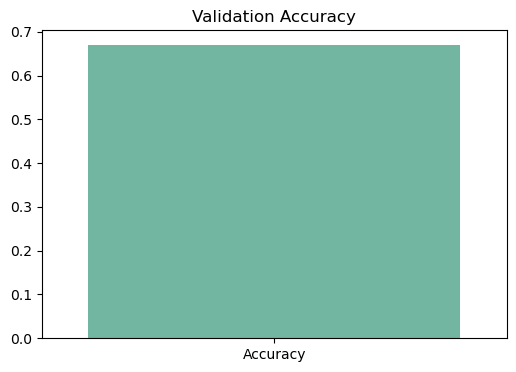

In [100]:
plt.figure(figsize=(6, 4))
sns.barplot(x=['Accuracy'], y=[accuracy_valid], palette='Set2')
plt.title('Validation Accuracy')
plt.show()

## MODEL TESTING

In [101]:
class_dir_test = "D:\\PLANT_DISEASE\\archive (7)\\test\\test_final"

In [102]:
feature_test=[]
label_test=[]

In [103]:
for image_file in os.listdir(class_dir_test):
    image_path = os.path.join(class_dir_test, image_file)
    
    image = cv2.imread(image_path)

    image = cv2.resize(image, (128, 128))

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                    cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')

    feature_test.append(features)
    label_test.append(image_file)

In [104]:
feature_test

[array([0.3878978 , 0.04213401, 0.02896267, ..., 0.09204177, 0.08195669,
        0.08477164]),
 array([0.17569234, 0.06930438, 0.14314371, ..., 0.        , 0.21528088,
        0.0906029 ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.38116011, 0.        , 0.        , ..., 0.2942634 , 0.2942634 ,
        0.2942634 ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.34665116, 0.2475154 , 0.        , ..., 0.06811334, 0.09349503,
        0.14697103]),
 array([0.21679891, 0.05887299, 0.12048961, ..., 0.10753159, 0.04857285,
        0.        ]),
 array([0.20518527, 0.15536076, 0.13425269, ..., 0.12229223, 0.13323229,
        0.11584329]),
 array([0.23169404, 0.05120109, 0.09467042, ..., 0.18466962, 0.11242249,
        0.2215013 ]),
 array([0.23211236, 0.10355923, 0.2093943 , ..., 0.0656748 , 0.10546845,
        0.17560894]),
 array([0.20376697, 0.11517297, 0.1362592 , ..., 0.12960245, 0.07519557,
        0.0

In [105]:
label_test

['Apple_Black_rot (1).JPG',
 'Apple_Black_rot (2).JPG',
 'Apple_Black_rot (3).JPG',
 'Apple___Black_rot.JPG',
 'Corn_(maize)___Common_rust_ (1).JPG',
 'Corn_(maize)___Common_rust_ (2).JPG',
 'Corn_(maize)___Common_rust_ (3).JPG',
 'Corn_(maize)___Common_rust_.JPG',
 'Grape_Black_rot (1).JPG',
 'Grape_Black_rot (2).JPG',
 'Grape_Black_rot (3).JPG',
 'Grape___Black_rot.JPG',
 'Orange_Haunglingbing (1).JPG',
 'Orange_Haunglingbing (2).JPG',
 'Orange_Haunglingbing (3).JPG',
 'Orange___Haunglongbing_(Citrus_greening).JPG',
 'Peach_Bacterial_spot (1).JPG',
 'Peach_Bacterial_spot (2).JPG',
 'Peach_Bacterial_spot (3).JPG',
 'Peach___Bacterial_spot.JPG',
 'PotatoEarlyBlight1.JPG',
 'PotatoEarlyBlight2.JPG',
 'PotatoEarlyBlight4.JPG',
 'Potato___Early_blight.JPG',
 'Squash___Powdery_mildew.JPG',
 'Strawberry_lear_scorch (1).JPG',
 'Strawberry_lear_scorch (2).JPG',
 'Strawberry___Leaf_scorch.JPG',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus (4).JPG',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus (5).JPG'

In [106]:
x_test =np.array(feature_test)
y_test = np.array([0,0,0,0,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,8,8,8,8,11,12,12,12,14,14,14,14])


In [107]:
y_test_pred = KNN_model.predict(x_test)

In [108]:
y_test.shape

(32,)

In [109]:
y_test_pred.shape

(32,)

In [110]:
y_test

array([ 0,  0,  0,  0,  3,  3,  3,  3,  4,  4,  4,  4,  5,  5,  5,  5,  6,
        6,  6,  6,  8,  8,  8,  8, 11, 12, 12, 12, 14, 14, 14, 14])

In [111]:
y_test_pred

array([ 0,  0,  0,  0,  3,  3,  1,  3, 11,  4, 11,  4,  8,  5,  5,  5, 11,
        6, 11,  6,  8,  8, 10,  8, 11, 12, 12, 11, 14, 14, 14,  5],
      dtype=int64)

### ACCURACY BEFORE HYPERPARAMETER TUNING

In [112]:
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_valid = confusion_matrix(y_test, y_test_pred)
class_report_valid = classification_report(y_test, y_test_pred, zero_division=1)

In [113]:
accuracy_test

0.71875

## GRID SEARCH (HYPER PARAMETER TUNING)

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9],             # Number of neighbors to consider
    'p': [1, 2],                             # Power parameter for Minkowski distance metric
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

grid_search.fit(X, y_enc)  

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

best_model.fit(X, y_enc) 



Fitting 5 folds for each of 8 candidates, totalling 40 fits


Best Hyperparameters: {'n_neighbors': 3, 'p': 1}


KNeighborsClassifier(n_neighbors=3, p=1)

## RESULTS OF EACH FIT

In [61]:
import pandas as pd

results = grid_search.cv_results_

results_df = pd.DataFrame(results)

results_df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.977563,0.047720,243.614249,16.440219,3,1,"{'n_neighbors': 3, 'p': 1}",0.659333,0.654000,0.636000,0.675333,0.668000,0.658533,0.013422,1
1,1.002570,0.038541,26.508869,3.242116,3,2,"{'n_neighbors': 3, 'p': 2}",0.527333,0.505333,0.504667,0.542667,0.513333,0.518667,0.014514,5
2,0.973041,0.038232,262.841863,16.578741,5,1,"{'n_neighbors': 5, 'p': 1}",0.654667,0.649333,0.621333,0.676667,0.658000,0.652000,0.017884,2
3,1.039155,0.067731,28.349883,6.184806,5,2,"{'n_neighbors': 5, 'p': 2}",0.482000,0.464667,0.471333,0.509333,0.484667,0.482400,0.015282,6
4,1.190640,0.127404,253.798091,4.507268,7,1,"{'n_neighbors': 7, 'p': 1}",0.640667,0.626667,0.615333,0.667333,0.642000,0.638400,0.017464,3
5,1.631646,0.480743,42.500224,3.964069,7,2,"{'n_neighbors': 7, 'p': 2}",0.456000,0.441333,0.441333,0.476667,0.458667,0.454800,0.013094,7
6,1.316317,0.193036,102.646895,4.223019,9,1,"{'n_neighbors': 9, 'p': 1}",0.624667,0.616000,0.599333,0.654667,0.631333,0.625200,0.018220,4
7,1.357670,0.126841,24.790697,4.647536,9,2,"{'n_neighbors': 9, 'p': 2}",0.434000,0.424667,0.422000,0.469333,0.432667,0.436533,0.017025,8


# TUNED MODEL TRANING 

In [114]:
KNN_model_tuned = KNeighborsClassifier(
    n_neighbors=3,       # Choose an appropriate number of neighbors
    p=1,  # Choose a suitable distance metric
)

In [115]:
KNN_model_tuned.fit(X, y_enc)

KNeighborsClassifier(n_neighbors=3, p=1)

In [175]:
class_dir_test = "D:\\PLANT_DISEASE\\archive (7)\\test\\test_final"

In [176]:
feature_test=[]
label_test=[]

In [177]:
for image_file in os.listdir(class_dir_test):
    image_path = os.path.join(class_dir_test, image_file)
    
    image = cv2.imread(image_path)
    
    image = cv2.resize(image, (128, 128))
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                    cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')
    
    feature_test.append(features)
    label_test.append(image_file)

In [178]:
x_test =np.array(feature_test)
y_test = np.array([0,0,0,0,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,8,8,8,8,11,12,12,12,14,14,14,14])


In [179]:
y_test_pred = KNN_model_tuned.predict(x_test)

In [180]:
y_test_pred

array([ 0,  0,  0,  0,  3,  3,  1,  3, 11,  4, 11,  4,  8,  5,  5,  5, 11,
        6, 11,  6,  8,  8, 10,  8, 11, 12, 12, 11, 14, 14, 14,  5],
      dtype=int64)

## ACCURACY IMPROVEMENT AFTER TUNING

In [181]:
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_valid = confusion_matrix(y_test, y_test_pred)
class_report_valid = classification_report(y_test, y_test_pred, zero_division=1)

In [182]:
accuracy_test

0.71875

## PERFORMANCE METRICS

In [183]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test,y_test_pred)
conf_matrix = confusion_matrix(y_test,y_test_pred)
class_report = classification_report(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred, average='weighted')
recall = recall_score(y_test,y_test_pred, average='weighted')
f1 = f1_score(y_test,y_test_pred, average='weighted')

c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1

In [184]:
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [accuracy, precision, recall, f1]
})

metrics_df

,Metric,Value
0,Accuracy,0.718750
1,Precision,0.911458
2,Recall,0.718750
3,F1-Score,0.777381


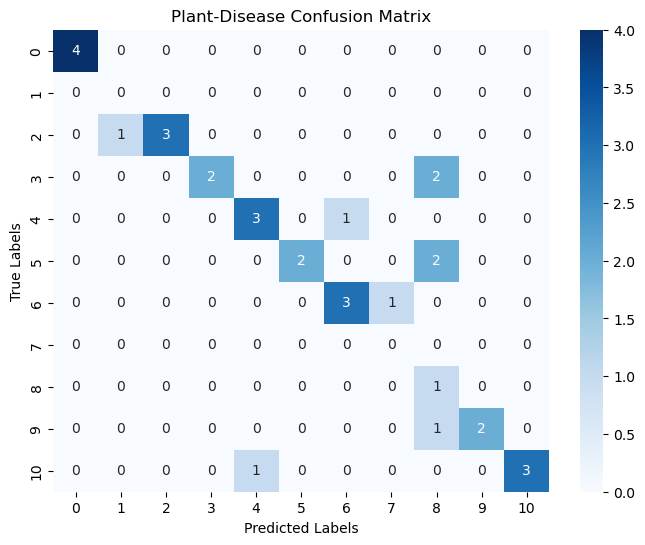

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Plant-Disease Confusion Matrix')

plt.show()

# SAVING THE TUNED MODEL

In [137]:
from joblib import dump

dump(KNN_model_tuned, 'KNN_PLANT_DISEASE.joblib')

['KNN_PLANT_DISEASE.joblib']

## IMAGE TRANSFORMATION

In [150]:
test_image_path = "D:\\PLANT_DISEASE\\archive (7)\\test\\test_final\\Apple___Black_rot.JPG"

In [151]:
image = cv2.imread(test_image_path)

In [152]:
image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

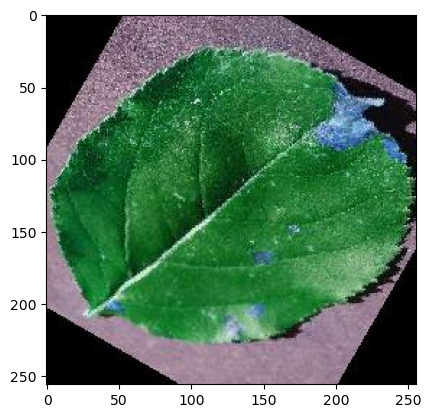

In [153]:
plt.imshow(image)
plt.show()

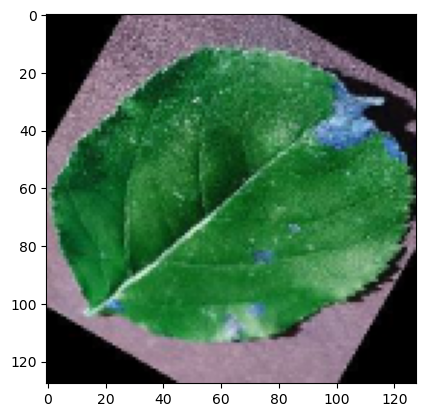

In [154]:
image = cv2.resize(image, (128, 128))
plt.imshow(image)
plt.show()

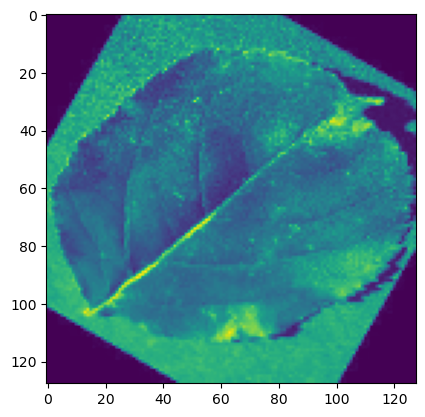

In [155]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
plt.show()

In [156]:
x_test = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')
x_test

array([0., 0., 0., ..., 0., 0., 0.])

## PREDICTIVE SYSTEM (USING THE SAVED MODEL)

In [157]:
from joblib import load
loaded_KNN_model = load("D:\\PLANT_DISEASE\\archive (7)\\KNN_PLANT_DISEASE.joblib")

In [158]:
y_test_pred = loaded_KNN_model.predict(x_test.reshape(1, -1))

In [159]:
y_test_pred[0]

0

In [160]:
dict = {
    0	: "Apple-Black-rot",
1:	"Blueberry-healthy",
2:	"Cherry-Powdery-mildew",
3:	"Corn-(maize)-Common-rust",
4:	"Grape-Black-rot",
5:	"Orange-Haunglongbing-(Citrus_greening)",
6:	"Peach-Bacterial-spot",
7:	"Pepper-bell-Bacterial-spot",
8:	"Potato-Early-blight",
9:	"Raspberry-healthy",
10:	"Soybean-healthy",
11:	"Squash-Powdery-mildew",
12:	"Strawberry-Leaf-scorch",
13:	"Tomato-Early-blight",
14:	"Tomato-Tomato-Yellow-Leaf-Curl-Viru",
    
}

In [161]:
dict[y_test_pred[0]]

'Apple-Black-rot'

## VISUALISATION (USING DIMENSIOANLITY REDUCTION)

In [162]:
X.shape,y.shape

((7500, 8100), (7500,))

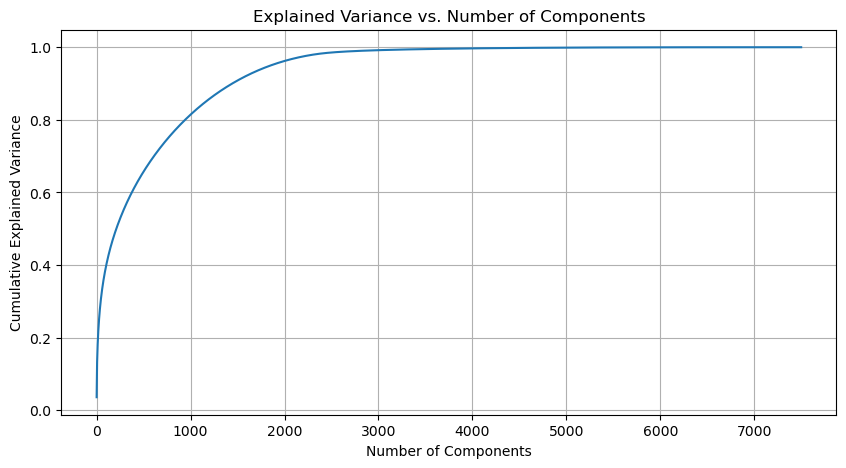

In [163]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()

pca.fit(X)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

In [164]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3000)

x_pca = pca.fit_transform(X)


In [165]:
x_pca.shape,y.shape

((7500, 3000), (7500,))

In [166]:
df = pd.DataFrame(x_pca)
df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,-0.353252,-0.840564,-0.994494,0.593439,-0.196132,-0.118514,0.855202,-0.894554,-0.382983,-0.007882,...,0.008170,-0.027999,0.019456,0.009474,0.013737,-0.018873,-0.028807,-0.002321,0.009372,0.030172
1,-0.355191,-1.243878,-0.178584,0.753212,-0.100948,0.360354,-0.335312,-0.399458,-0.417149,-0.010448,...,-0.018510,0.005545,0.002279,-0.004408,-0.013629,0.009469,0.003486,0.016695,-0.017532,0.007674
2,-0.424512,-1.113491,-0.297861,0.680344,-0.176030,0.325187,0.309495,-0.526262,0.525315,0.542422,...,0.011537,-0.008257,0.020232,-0.002448,-0.011246,-0.005356,-0.004177,0.013627,-0.013532,-0.011349
3,2.171722,0.318889,-0.603505,4.362394,-0.173255,0.122178,0.583696,-0.252044,0.456435,-0.211913,...,0.020218,0.009690,0.022308,-0.000863,-0.022961,-0.027344,-0.007034,-0.010198,-0.007303,0.013121
4,-0.141556,-0.156856,-0.337249,-0.491358,0.315878,1.144522,0.383253,-0.282857,-2.107894,-0.050300,...,-0.015859,-0.012651,-0.014751,0.002366,-0.036997,-0.011012,0.027037,0.021896,-0.001930,0.018836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,-1.024795,1.735009,2.549669,-0.769239,1.731102,-1.708029,1.893686,0.129349,-0.042068,0.891799,...,0.014723,0.017892,-0.063839,0.018714,0.008318,-0.008918,0.033377,0.020972,-0.013999,-0.020848
7496,-0.269296,-0.966391,1.949614,0.777088,-1.224380,-1.294816,-0.416970,-0.801767,0.004220,-0.478731,...,-0.024769,-0.001647,0.006240,0.026464,0.012644,-0.057486,-0.006072,-0.027302,0.014623,0.006679
7497,-0.871903,0.322688,-1.376373,-0.335832,0.613099,-0.675550,0.072168,0.488077,-0.282086,-0.608641,...,0.001813,-0.006841,0.012759,0.000158,0.000338,0.008001,0.003545,-0.007949,0.002761,0.035777
7498,-0.686404,0.039189,-0.349691,-0.109039,-1.929338,0.361172,-1.067934,1.454776,0.611792,-0.528178,...,-0.008400,-0.036059,-0.004792,0.009063,0.026150,0.034689,0.003028,-0.021756,-0.047919,-0.012885


## SCATTER PLOT

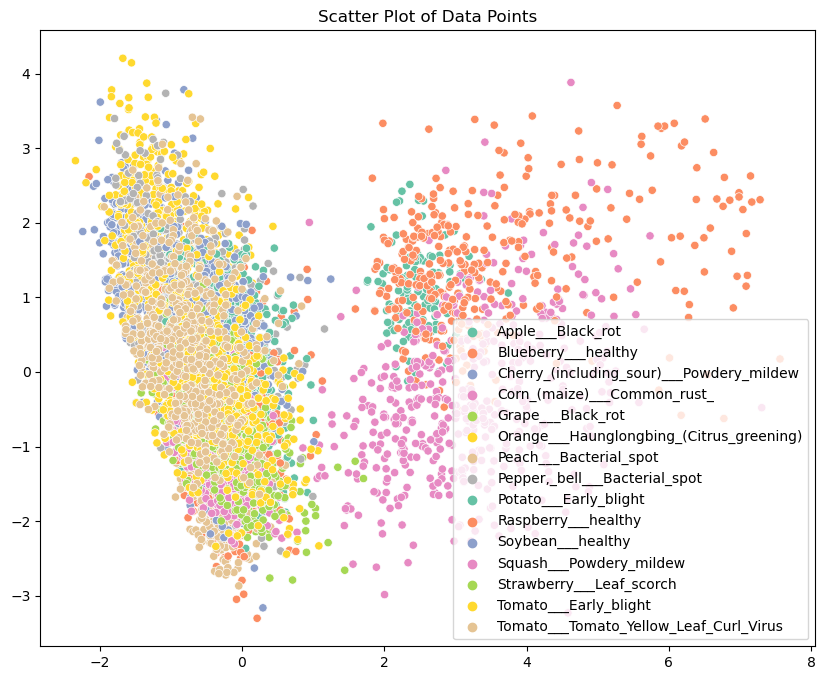

In [168]:
import seaborn as sns

plt.figure(figsize=(10, 8))

sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y, palette="Set2")
plt.title("Scatter Plot of Data Points")
plt.show()

## ROC CURVE

In [169]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

y_bin = label_binarize(y_enc, classes=np.arange(15))

classifier = OneVsRestClassifier(loaded_KNN_model)
y_score = classifier.fit(x_pca, y_enc).predict_proba(x_pca)


In [171]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(15):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


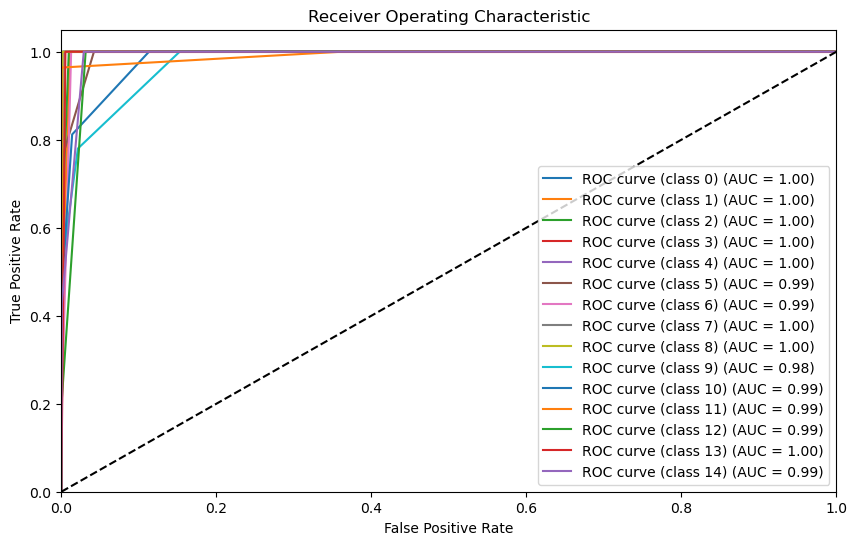

In [172]:
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.plot(fpr[i], tpr[i], label=f"ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

## ERROR CURVE - (MISCLASSIFICATION)

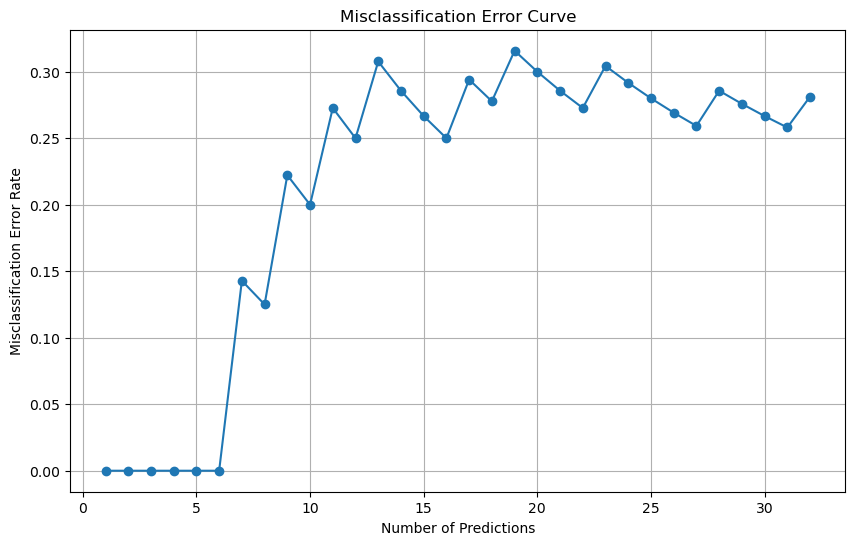

In [191]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

error_rate_values = []

for i in range(1, len(y_test_pred) + 1):
    error_rate = 1 - accuracy_score(y_test[:i], y_test_pred[:i])
    error_rate_values.append(error_rate)

x_values = range(1, len(y_test_pred) + 1)

plt.figure(figsize=(10, 6))
plt.plot(x_values, error_rate_values, marker='o', linestyle='-')
plt.title('Misclassification Error Curve')
plt.xlabel('Number of Predictions')
plt.ylabel('Misclassification Error Rate')
plt.grid()
plt.show()